In [71]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

In [72]:
city_data_df = pd.read_csv("Resources/city_data.csv")
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [73]:
ride_data_df = pd.read_csv("Resources/ride_data.csv")
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [74]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [75]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [76]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [77]:
# Unique values of each city 
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [78]:
sum(city_data_df["type"] == "Urban")

66

In [79]:
sum(city_data_df["type"] == "Suburban")

36

In [80]:
sum(city_data_df["type"] == "Rural")

18

In [81]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [82]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [83]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [84]:
# Merge the DataFrames
pyber_data_df = pd.merge(city_data_df, ride_data_df, how = "left",
                         on = ["city", "city"])
pyber_data_df

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2019-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2019-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2019-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2019-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2019-04-17 02:26:37,23.00,720020655850
...,...,...,...,...,...,...
2370,Jessicaport,1,Rural,2019-01-31 17:57:25,58.29,623154556195
2371,South Saramouth,7,Rural,2019-02-20 16:32:36,44.29,3622365199969
2372,South Saramouth,7,Rural,2019-01-28 15:55:33,31.25,7118046558393
2373,South Saramouth,7,Rural,2019-03-27 21:07:16,11.87,170351888128


In [85]:
average_fare = pyber_data_df.groupby(["type"]).mean()["fare"]
ride_total = pyber_data_df.count()["ride_id"]
average_drive_count = pyber_data_df.groupby(["type"]).mean()["driver_count"]

In [86]:
# Create the DataFrames for each city
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2019-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2019-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2019-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2019-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2019-04-17 02:26:37,23.00,720020655850


In [87]:
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,driver_count,type,date,fare,ride_id
1625,Port Shane,7,Suburban,2019-04-09 15:34:40,27.66,4022340141966
1626,Port Shane,7,Suburban,2019-04-23 16:05:47,42.26,8341982666719
1627,Port Shane,7,Suburban,2019-03-02 12:06:00,14.95,2803204948363
1628,Port Shane,7,Suburban,2019-03-26 04:33:30,19.03,6010401984537
1629,Port Shane,7,Suburban,2019-03-15 12:09:42,31.58,2552978514662


In [88]:
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,driver_count,type,date,fare,ride_id
2250,South Jennifer,7,Rural,2019-04-01 09:32:45,21.63,9135979586871
2251,South Jennifer,7,Rural,2019-03-07 19:10:13,48.79,9730627367446
2252,South Jennifer,7,Rural,2019-04-05 14:35:42,32.20,683983658392
2253,South Jennifer,7,Rural,2019-04-02 10:26:50,14.11,3828267773041
2254,South Jennifer,7,Rural,2019-04-10 20:46:11,43.25,623928772332


In [89]:
# Number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [90]:
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count

city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64

In [91]:
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count

city
Barronchester         16
Bethanyland           18
Brandonfort           19
Colemanland           22
Davidfurt             17
East Aaronbury         9
East Danielview       17
East Kentstad         13
East Marymouth        27
Grayville             15
Josephside            27
Lake Ann              12
Lake Omar             14
Lake Robertside       25
Lake Scott            18
Lewishaven            12
Lewisland             17
Mezachester           17
Myersshire            16
New Olivia            17
New Raymond           22
New Shannonberg       17
Nicolechester         19
North Jeffrey         13
North Richardhaven    14
North Timothy         15
Port Shane            19
Rodriguezview         15
Sotoville             11
South Brenda          24
South Teresa          22
Veronicaberg          17
Victoriaport          14
West Hannah           21
West Kimmouth         20
Williamsonville       14
Name: ride_id, dtype: int64

In [92]:
# average fare for each city 
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [93]:
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [94]:
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [100]:
# average number of drivers
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [101]:
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

In [102]:
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

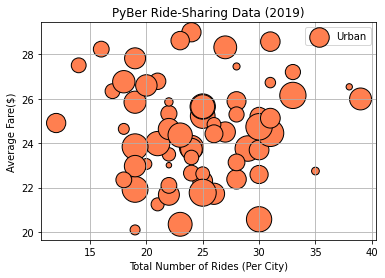

In [123]:
# Bubble Chart
plt.scatter(urban_ride_count, urban_avg_fare, s = 10 * urban_drive_count,
           c = 'coral', edgecolors = 'black',
           linewidths = 1, label = "Urban")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")

plt.grid(True)
plt.legend()

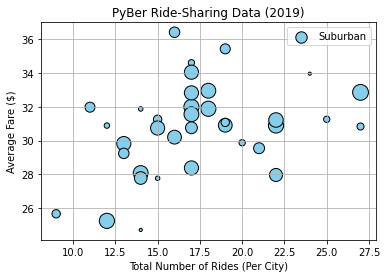

In [133]:
plt.scatter(suburban_ride_count, suburban_avg_fare, 
            s = 10 * suburban_driver_count, c = "skyblue", 
            edgecolors = 'black', linewidths = 1,
            label = 'Suburban')

plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

plt.grid(True)
plt.legend()

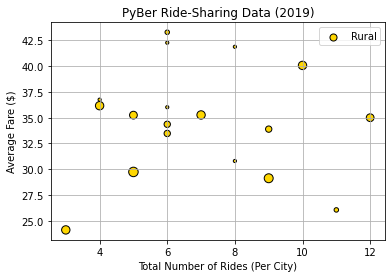

In [134]:
plt.scatter(rural_ride_count, rural_avg_fare, s = 10 * rural_driver_count,
           c = 'gold', edgecolors = 'black', 
            linewidths = 1, label = 'Rural')

plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

plt.grid(True)
plt.legend()

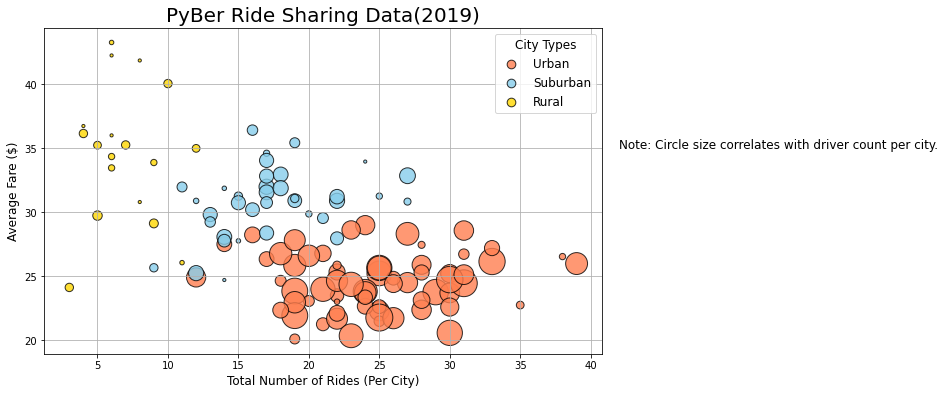

<Figure size 432x288 with 0 Axes>

In [150]:
# Combine all the bubble charts 
plt.subplots(figsize=(10,6))

plt.scatter(urban_ride_count, urban_avg_fare, s = 10 * urban_drive_count,
           c = 'coral', edgecolors = 'black',
           linewidths = 1, label = "Urban", alpha = 0.8)

plt.scatter(suburban_ride_count, suburban_avg_fare, 
            s = 10 * suburban_driver_count, c = "skyblue", 
            edgecolors = 'black', linewidths = 1,
            label = 'Suburban', alpha = 0.8)

plt.scatter(rural_ride_count, rural_avg_fare, s = 10 * rural_driver_count,
           c = 'gold', edgecolors = 'black', 
            linewidths = 1, label = 'Rural', alpha = 0.8)

plt.title('PyBer Ride Sharing Data(2019)', fontsize=20)
plt.xlabel('Total Number of Rides (Per City)', fontsize = 12)
plt.ylabel('Average Fare ($)', fontsize = 12)

plt.grid(True)

# Create the legend
lgnd = plt.legend(fontsize = "12", mode = "Expanded",
                 scatterpoints = 1, loc = "best", title = "City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Text label
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

plt.show()

# Save the Figure
plt.savefig("analysis/Fig1.png")

In [151]:
# Summary Statistics 
urban_cities_df.describe()

,driver_count,fare,ride_id
count,1625.000000,1625.000000,1.625000e+03
mean,36.678154,24.525772,4.873485e+12
std,20.075545,11.738649,2.907440e+12
min,3.000000,4.050000,1.458810e+10
25%,22.000000,14.550000,2.400244e+12
50%,37.000000,24.640000,4.711188e+12
75%,52.000000,34.580000,7.451579e+12
max,73.000000,44.970000,9.991538e+12


In [152]:
suburban_cities_df.describe()

,driver_count,fare,ride_id
count,625.000000,625.000000,6.250000e+02
mean,13.712000,30.970128,4.971015e+12
std,8.042372,10.677508,2.912410e+12
min,1.000000,12.050000,3.218337e+08
25%,5.000000,21.970000,2.364253e+12
50%,16.000000,30.750000,5.053221e+12
75%,21.000000,39.830000,7.551674e+12
max,25.000000,49.960000,9.917744e+12


In [153]:
rural_cities_df.describe()

,driver_count,fare,ride_id
count,125.000000,125.000000,1.250000e+02
mean,4.296000,34.623440,4.647746e+12
std,2.691156,14.558046,2.887834e+12
min,1.000000,10.110000,2.684873e+10
25%,1.000000,19.900000,2.275364e+12
50%,4.000000,37.050000,4.023962e+12
75%,7.000000,47.070000,7.118047e+12
max,9.000000,58.550000,9.990581e+12


In [154]:
# Ride Count
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [155]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [156]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [163]:
# Calculate the mean of the ride count for each city type
round(urban_ride_count.mean(), 2), round(suburban_ride_count.mean(), 2), round(rural_ride_count.mean(), 2)

(24.62, 17.36, 6.94)

In [164]:
round(urban_ride_count.median(), 2), round(suburban_ride_count.median(), 2), round(rural_ride_count.median(), 2)

(24.0, 17.0, 6.0)

In [167]:
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [168]:
suburban_ride_count.mode()

0    17
dtype: int64

In [169]:
rural_ride_count.mode()

0    6
dtype: int64

In [172]:
# Import NumPy and the stats module from SciPy (use when not in Jupyter)
import numpy as np
import scipy.stats as sts 

In [184]:
# Measures of Central Tendency
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}")

The mean for the ride counts for urban trips is 24.62
The median for the ride counts for urban trips is 24.0
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7]))


In [183]:
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}")

The mean for the ride counts for suburban trips is 17.36
The median for the ride counts for suburban trips is 17.0
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7]))


In [182]:
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}")

The mean for the ride counts for rural trips is 6.94
The median for the ride counts for rural trips is 6.0
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5]))


In [177]:
# Get the fares for the urban cities
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.93
1    14.00
2    17.92
3    10.26
4    23.00
Name: fare, dtype: float64

In [197]:
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is ${mode_urban_fares}")

The mean fare price for urban trips is $24.53
The median fare price for urban trips is $24.64
The mode fare price for urban trips is $ModeResult(mode=array([22.86]), count=array([5]))


In [198]:
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()

1625    27.66
1626    42.26
1627    14.95
1628    19.03
1629    31.58
Name: fare, dtype: float64

In [199]:
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is ${mode_suburban_fares}")

The mean fare price for suburban trips is $30.97
The median fare price for suburban trips is $30.75
The mode fare price for suburban trips is $ModeResult(mode=array([17.99]), count=array([3]))


In [200]:
rural_fares = rural_cities_df["fare"]
rural_fares.head()

2250    21.63
2251    48.79
2252    32.20
2253    14.11
2254    43.25
Name: fare, dtype: float64

In [201]:
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is ${mode_rural_fares}")

The mean fare price for rural trips is $34.62
The median fare price for rural trips is $37.05
The mode fare price for rural trips is $ModeResult(mode=array([37.05]), count=array([2]))


In [202]:
urban_drivers = urban_cities_df["driver_count"]

suburban_drivers = suburban_cities_df["driver_count"]

rural_drivers = rural_cities_df["driver_count"]

In [216]:
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean fare price for urban trips is {mean_urban_drivers:.2f}")
median_urban_drivers = np.median(urban_drivers)
print(f"The median fare price for urban trips is {median_urban_drivers:.2f}")
mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode fare price for urban trips is {mode_urban_drivers}")
print('')

mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean fare price for suburban trips is {mean_suburban_drivers:.2f}")
median_suburban_drivers = np.median(suburban_drivers)
print(f"The median fare price for suburban trips is {median_suburban_drivers:.2f}")
mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode fare price for suburban trips is {mode_suburban_drivers}")
print('')

mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean fare price for rural trips is {mean_rural_drivers:.2f}")
median_rural_drivers = np.median(rural_drivers)
print(f"The median fare price for rural trips is {median_rural_drivers:.2f}")
mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode fare price for rural trips is {mode_rural_drivers:}")

The mean fare price for urban trips is 36.68
The median fare price for urban trips is 37.00
The mode fare price for urban trips is ModeResult(mode=array([39]), count=array([86]))

The mean fare price for suburban trips is 13.71
The median fare price for suburban trips is 16.00
The mode fare price for suburban trips is ModeResult(mode=array([20]), count=array([79]))

The mean fare price for rural trips is 4.30
The median fare price for rural trips is 4.00
The mode fare price for rural trips is ModeResult(mode=array([1]), count=array([32]))


## Box and Whisker Plot: Ride Count Data 

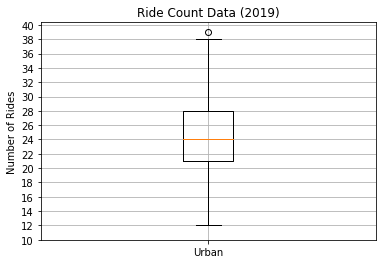

In [218]:
# Urban cities ride count
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels = x_labels)

ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10, 41, step = 2.0))

ax.grid()
plt.show()

In [219]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

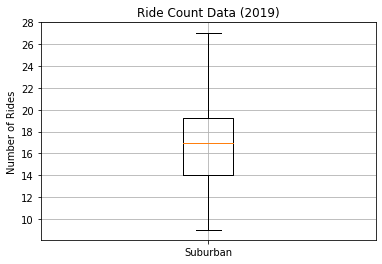

In [225]:
# Suburban Cities
x_labels = ["Suburban"]
fig, ax = plt.subplots()

ax.boxplot(suburban_ride_count, labels = x_labels)
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10, 30, step = 2.0))

ax.grid()
plt.show()

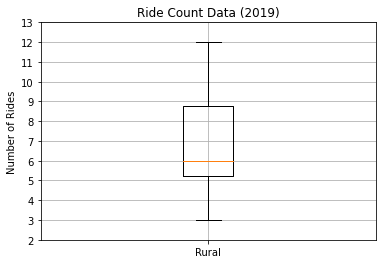

In [228]:
# Rural Cities
x_labels = ["Rural"]
fig, ax = plt.subplots()

ax.boxplot(rural_ride_count, labels = x_labels)
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(2, 14, step = 1.0))

ax.grid()
plt.show()

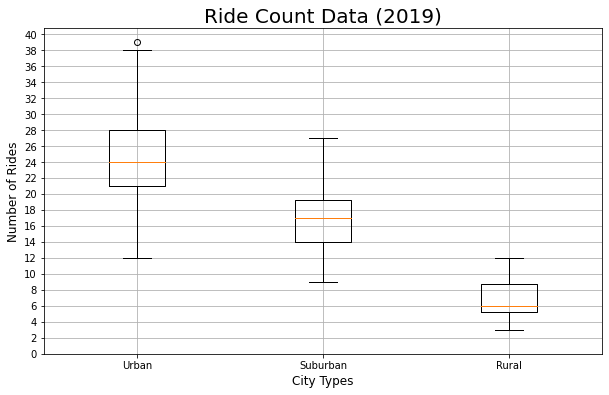

<Figure size 432x288 with 0 Axes>

In [233]:
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]

fig, ax = plt.subplots(figsize = (10, 6))
ax.boxplot(ride_count_data, labels = x_labels)
ax.set_title("Ride Count Data (2019)", fontsize = 20)
ax.set_ylabel("Number of Rides", fontsize = 12)
ax.set_xlabel("City Types", fontsize = 12)

ax.set_yticks(np.arange(0, 41, step = 2.0))

ax.grid()
plt.show()

# Save the figure
plt.savefig("analysis/Fig2.png")

In [234]:
# Outlier 
urban_city_outlier = urban_ride_count[urban_ride_count == 39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


## Box and Whisker Plots: Ride Fare Data 

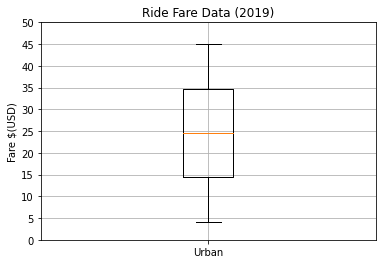

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [235]:
# Urban Cities 
x_labels = ["Urban"]
fig, ax = plt.subplots()

ax.boxplot(urban_fares, labels = x_labels)

ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare $(USD)")
ax.set_yticks(np.arange(0, 51, step = 5.0))

ax.grid()
plt.show()

print("Summary Statistics")
urban_fares.describe()

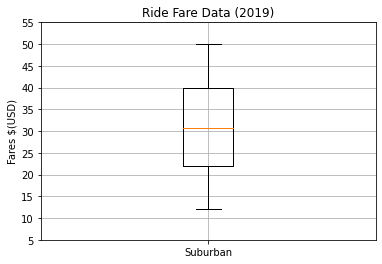

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [240]:
# Suburban Cities
x_labels = ["Suburban"]
fig, ax = plt.subplots()

ax.boxplot(suburban_fares, labels = x_labels)
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fares $(USD)")
ax.set_yticks(np.arange(5, 60, step = 5.0))

ax.grid()
plt.show()

print("Summary Statistics")
suburban_fares.describe()

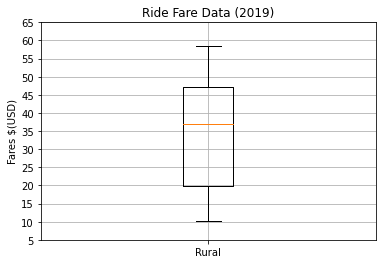

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [242]:
# Rural Cities
x_labels = ["Rural"]
fig, ax = plt.subplots()

ax.boxplot(rural_fares, labels = x_labels)
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fares $(USD)")
ax.set_yticks(np.arange(5, 70, step = 5.0))

ax.grid()
plt.show()

print("Summary Statistics")
rural_fares.describe()

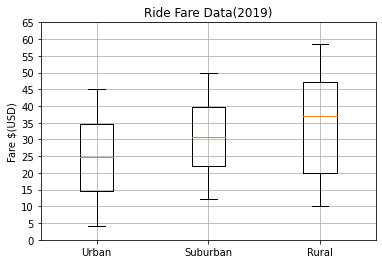

<Figure size 432x288 with 0 Axes>

In [246]:
# Combine
x_labels = ["Urban", "Suburban", "Rural"]
fare_count = [urban_fares, suburban_fares, rural_fares]

fig, ax = plt.subplots()
ax.boxplot(fare_count, labels = x_labels)

ax.set_title("Ride Fare Data(2019)")
ax.set_ylabel("Fare $(USD)")
ax.set_yticks(np.arange(0, 70, step = 5.0))

ax.grid()
plt.show()

plt.savefig("analysis/Fig3.png")

## Box and Whisker Plots: Driver Count Data 

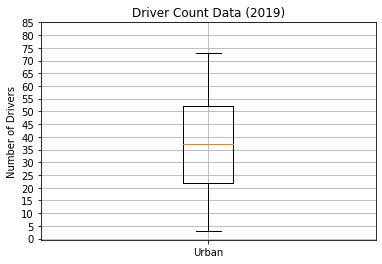

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [259]:
# Urban
x_labels = ["Urban"]
fig, ax = plt.subplots()

ax.boxplot(urban_drivers, labels = x_labels)
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 90, step = 5.0))

ax.grid()
plt.show()

print("Summary Statistics")
urban_drivers.describe()

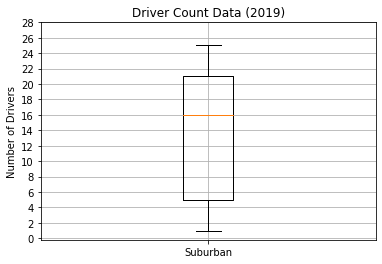

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [262]:
# Suburban
x_labels = ["Suburban"]
fig, ax = plt.subplots()

ax.boxplot(suburban_drivers, labels = x_labels)
ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 30, step = 2.0))

ax.grid()
plt.show()

print("Summary Statistics")
suburban_drivers.describe()

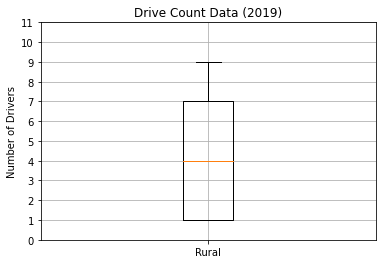

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [265]:
# Rural
x_labels = ["Rural"]
fig, ax = plt.subplots()

ax.boxplot(rural_drivers, labels = x_labels)
ax.set_title("Drive Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 12, step = 1.0))

ax.grid()
plt.show()

print("Summary Statistics")
rural_drivers.describe()

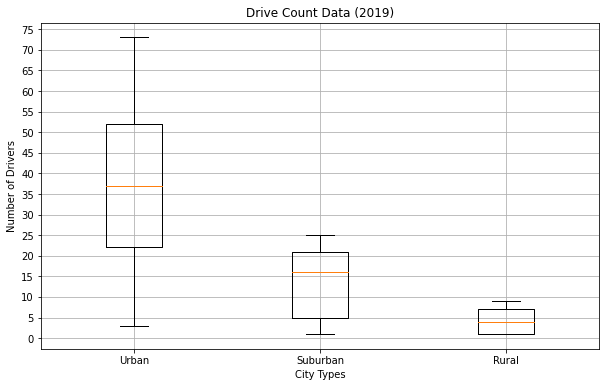

In [271]:
# Combine all the plots
x_labels = ["Urban", "Suburban", "Rural"]
driver_count = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize = (10, 6))

ax.boxplot(driver_count, labels = x_labels)
ax.set_title("Drive Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_xlabel("City Types")
ax.set_yticks(np.arange(0, 80, step = 5.0))

ax.grid()
plt.show()

## Percentage of Fares for Each City Type

In [273]:
# Sum of the fares
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [275]:
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [277]:
# Calculate the percentages
city_type_percentages = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / total_fares
city_type_percentages

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

### Create the pie chart

In [286]:
# changing the default parameters for pie charts
import matplotlib as mpl

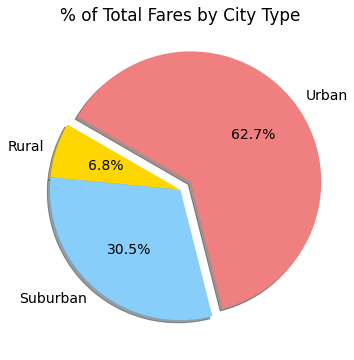

<Figure size 432x288 with 0 Axes>

In [291]:
plt.subplots(figsize = (10, 6))
plt.pie(city_type_percentages, labels = ["Rural", "Suburban", "Urban"],
       colors = ["gold", "lightskyblue", "lightcoral"],
       explode = [0, 0, 0.1], autopct = '%1.1f%%', shadow = True, 
       startangle = 150)

plt.title("% of Total Fares by City Type")

# Change the default font size from 10 to 14
mpl.rcParams['font.size'] = 14

plt.show()

plt.savefig("analysis/Fig4.png")

## Calculate Ride Percentages 

In [294]:
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

### Create the pie chart

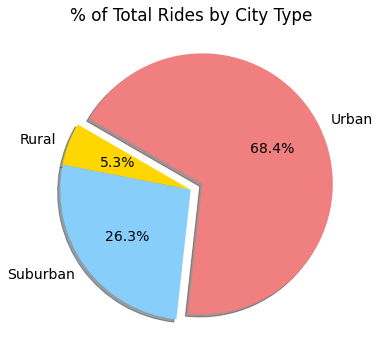

<Figure size 432x288 with 0 Axes>

In [297]:
plt.subplots(figsize = (10, 6))
plt.pie(ride_percents, labels = ["Rural", "Suburban", "Urban"], 
       colors = ["gold", "lightskyblue", "lightcoral"],
       explode = [0, 0, 0.1], autopct = "%1.1f%%",
        shadow = True, startangle = 150)
plt.title("% of Total Rides by City Type")

mpl.rcParams["font.size"] = 14

plt.show()

plt.savefig("analysis/Fig5.png")

## Calculate Driver Percentages

In [298]:
driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

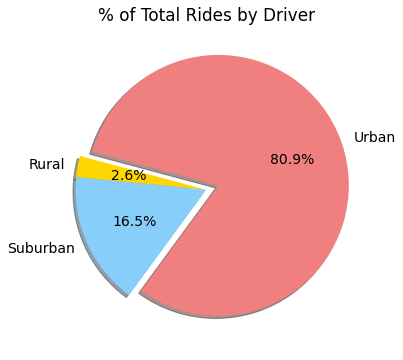

<Figure size 432x288 with 0 Axes>

In [303]:
plt.subplots(figsize = (10, 6))
plt.pie(driver_percents, labels = ["Rural", "Suburban", "Urban"],
       colors = ["gold", "lightskyblue", "lightcoral"],
       explode = [0, 0, 0.1], autopct = "%1.1f%%", shadow = True,
       startangle = 165)

plt.title("% of Total Rides by Driver")
mpl.rcParams["font.size"] = 14

plt.show()

plt.savefig("analysis/Fig6.png")